In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gwatpy.mcmc_routines as gmcmc
from corner import corner
import h5py 

In [2]:
N = 100
time = np.linspace(0,N,N)
dn = 2/ (N-1)
sigma = 1
beta = 5

In [3]:
true_data = np.loadtxt("../data/full_data_transdimensional_5_5_1_100.csv")
true_clean_data = np.loadtxt("../data/clean_data_transdimensional_5_5_1_100.csv")

In [4]:
def cheb_fn(P,coeff,x ):
    return np.sum(coeff[:P] * np.cos(np.arange(P)*np.arccos(x)))

In [6]:
data = gmcmc.RJPTMCMC_unpack_file("../data/output_trans.hdf5")
data_fixed_1 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim1.hdf5")
data_fixed_2 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim2.hdf5")
data_fixed_3 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim3.hdf5")
data_fixed_4 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim4.hdf5")

f1 = h5py.File("../data/output_trans_fixed_dim1.hdf5")
f2 = h5py.File("../data/output_trans_fixed_dim2.hdf5")
f3 = h5py.File("../data/output_trans_fixed_dim3.hdf5")
f4 = h5py.File("../data/output_trans_fixed_dim4.hdf5")

evidence1 = f1["MCMC_METADATA"]["EVIDENCE"][0]
evidence2 = f2["MCMC_METADATA"]["EVIDENCE"][0]
evidence3 = f3["MCMC_METADATA"]["EVIDENCE"][0]
evidence4 = f4["MCMC_METADATA"]["EVIDENCE"][0]
print(evidence1,evidence2,evidence3,evidence4)


trim:  0
ac:  30.4
trim:  0
ac:  38.8
trim:  0
ac:  24.2
trim:  0
ac:  16.2
-70.31200183381901 -70.88136753182032 -71.62904672996 -74.79331316919452


Bayes factor 5/6 (RJ):  5.020785098164899
Bayes factor 5/6 (PTMCMC):  1.7671457917550075
Bayes factor 5/4 (RJ):  7.108145743286851
Bayes factor 5/4 (PTMCMC):  3.732375507187936
Bayes factor 5/3 (RJ):  3882.9764957264956
Bayes factor 5/3 (PTMCMC):  88.35045382064166


(array([0.00000000e+00, 0.00000000e+00, 1.68481685e-04, 9.20367204e-02,
        6.54210422e-01, 1.30300423e-01, 1.97587976e-02, 2.90702907e-03,
        6.18126181e-04]),
 array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
 <BarContainer object of 9 artists>)

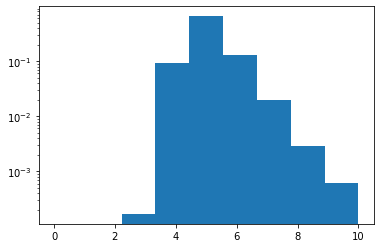

In [19]:
bins = np.linspace(0,len(data[1][0]),len(data[1][0]))
dims = np.sum(data[1],axis=1)
print("Bayes factor 5/6 (RJ): ",np.sum(dims == 5) / np.sum(dims==6))
print("Bayes factor 5/6 (PTMCMC): ",np.exp(evidence1 - evidence2))
print("Bayes factor 5/4 (RJ): ",np.sum(dims == 5) / np.sum(dims==4))
print("Bayes factor 5/4 (PTMCMC): ",np.exp(evidence1 - evidence3))
print("Bayes factor 5/3 (RJ): ",np.sum(dims == 5) / np.sum(dims==3))
print("Bayes factor 5/3 (PTMCMC): ",np.exp(evidence1 - evidence4))

plt.hist(dims,bins=bins,log=True,density=True)

In [8]:
recon = [[cheb_fn(np.sum(data[1][x,1:]), data[0][x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed1 = [[cheb_fn(len(data_fixed_1[x,1:]), data_fixed_1[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed2 = [[cheb_fn(len(data_fixed_2[x,1:]), data_fixed_2[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed3 = [[cheb_fn(len(data_fixed_3[x,1:]), data_fixed_3[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed4 = [[cheb_fn(len(data_fixed_4[x,1:]), data_fixed_4[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]


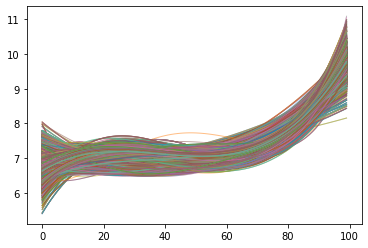

In [9]:
for x in recon:
    plt.plot(x,alpha=.5,linewidth=1)

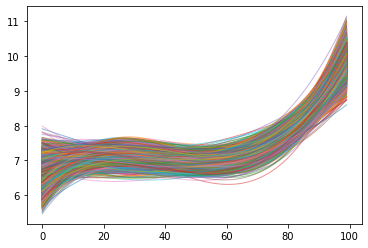

In [10]:
for x in recon_fixed1:
    plt.plot(x,alpha=.5,linewidth=1)

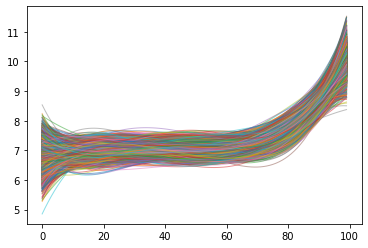

In [11]:
for x in recon_fixed2:
    plt.plot(x,alpha=.5,linewidth=1)

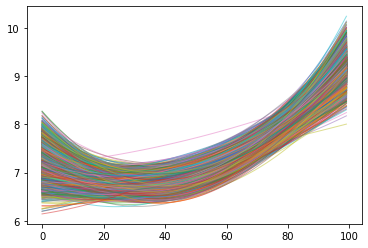

In [12]:
for x in recon_fixed3:
    plt.plot(x,alpha=.5,linewidth=1)

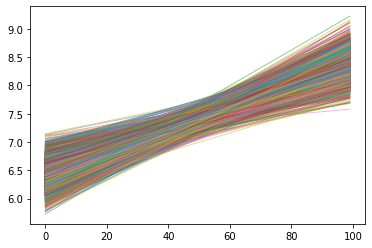

In [13]:
for x in recon_fixed4:
    plt.plot(x,alpha=.5,linewidth=1)

In [14]:
up = np.quantile(recon,.9,axis=0)
down = np.quantile(recon,.1,axis=0)
up_fixed1 = np.quantile(recon_fixed1,.9,axis=0)
down_fixed1 = np.quantile(recon_fixed1,.1,axis=0)
up_fixed2 = np.quantile(recon_fixed2,.9,axis=0)
down_fixed2 = np.quantile(recon_fixed2,.1,axis=0)
up_fixed3 = np.quantile(recon_fixed3,.9,axis=0)
down_fixed3 = np.quantile(recon_fixed3,.1,axis=0)
up_fixed4 = np.quantile(recon_fixed4,.9,axis=0)
down_fixed4 = np.quantile(recon_fixed4,.1,axis=0)

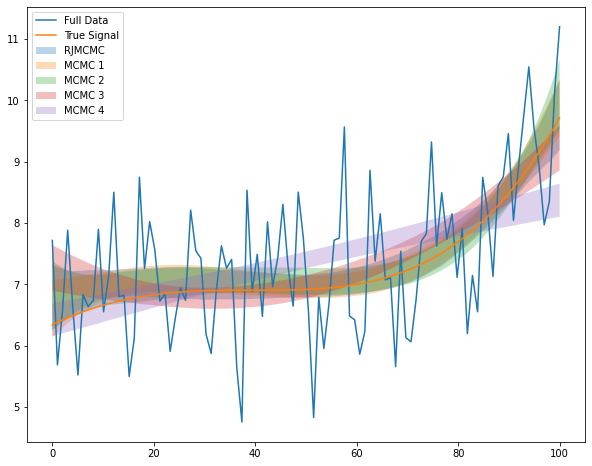

In [15]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[10,8])
ax.plot(time,true_data,label='Full Data')
ax.plot(time,true_clean_data,label="True Signal")
ax.fill_between(time,up,down,alpha=.3,label='RJMCMC')
ax.fill_between(time,up_fixed1,down_fixed1,alpha=.3,label='MCMC 1')
ax.fill_between(time,up_fixed2,down_fixed2,alpha=.3,label='MCMC 2')
ax.fill_between(time,up_fixed3,down_fixed3,alpha=.3,label='MCMC 3')
ax.fill_between(time,up_fixed4,down_fixed4,alpha=.3,label='MCMC 4')

ax.legend()

(array([   48.,   254.,  1878.,  8852., 20023., 24220., 20618.,  7619.,
         1555.,   212.]),
 array([-0.52674124, -0.40855672, -0.2903722 , -0.17218768, -0.05400316,
         0.06418136,  0.18236588,  0.3005504 ,  0.41873492,  0.53691944,
         0.65510396]),
 <BarContainer object of 10 artists>)

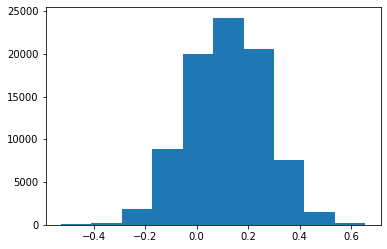

In [15]:
ID = 5
plt.hist(data[0][data[1][:,ID] == 1,ID])

In [16]:
dims = np.sum(data[1],axis=1)